# **Data Analysis for Supply Chain**

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime
import plotly.express as px

In [60]:
path = "../../../dataco-smart-supply-chain-for-big-data-analysis"
df=pd.read_csv(path+"/DataCoSupplyChainDataset.csv", encoding='latin1')


In [61]:
df=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)


In [62]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [63]:
df = df[(df['product_card_id'] == 191)] 
# df = df[(df['product_category_id'] == 9)] 
# Splitting the 'order_date_dateorders' column into separate date and time columns
df[['date', 'time']] = df['order_date_dateorders'].str.split(' ', expand=True)
# Converting the 'date' column to datetime with the format '%m/%d/%Y'
df['order_date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
# Sorting the DataFrame by 'order_date' to ensure chronological order
df = df.sort_values(by='order_date')
# Resetting the index to start from 1
df.reset_index(drop=True, inplace=True)




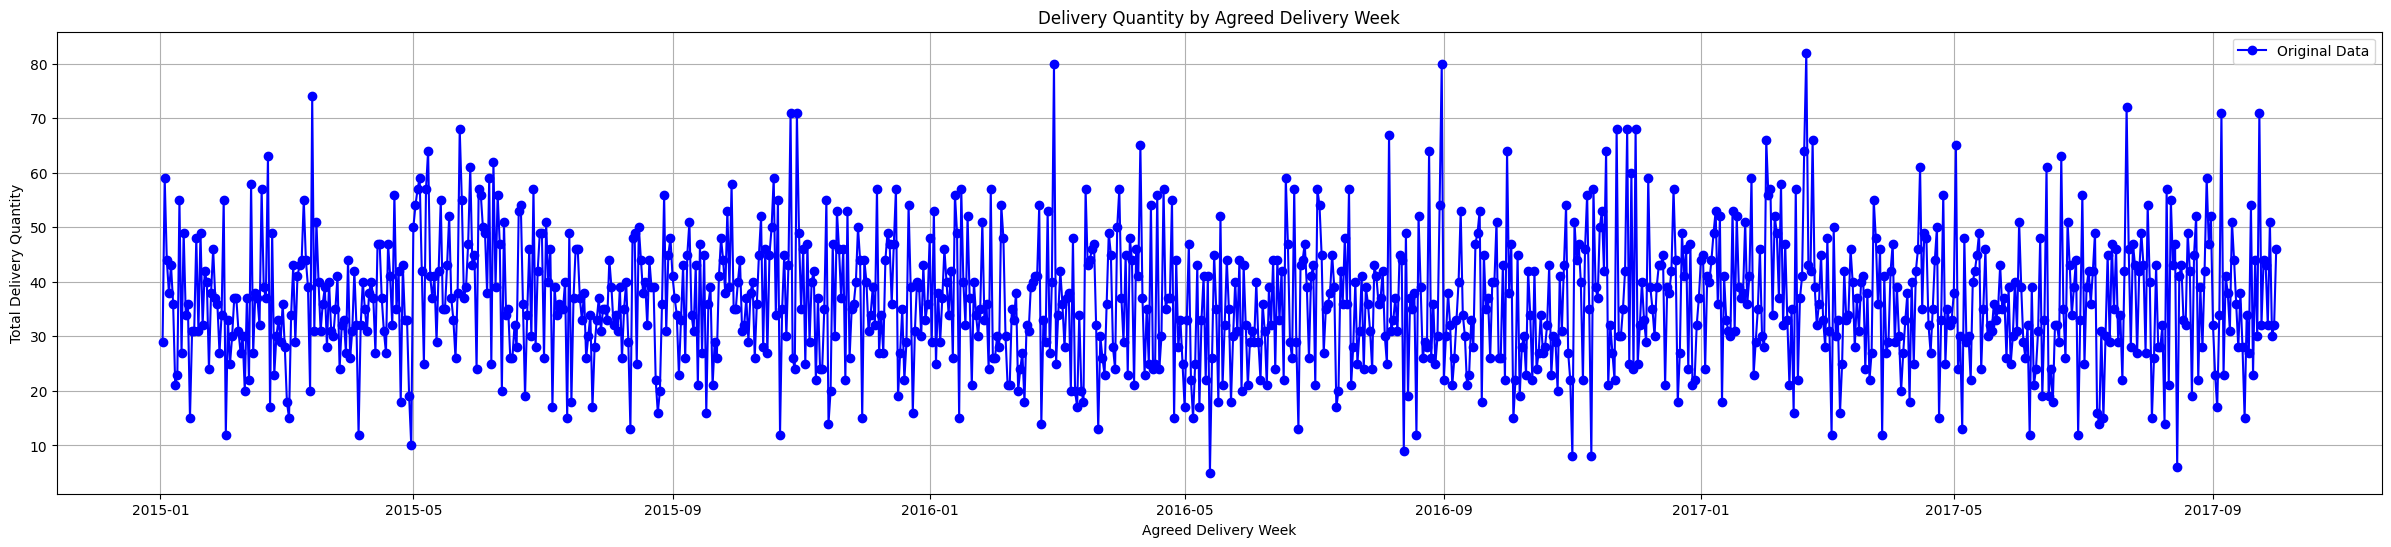

In [64]:
dfx = df.groupby('order_date')['order_item_quantity'].sum().reset_index()[1:-1]
plt.figure(figsize=(30, 6))
plt.plot(dfx['order_date'], dfx['order_item_quantity'], color='blue', marker='o', linestyle='-', label='Original Data')

plt.title('Delivery Quantity by Agreed Delivery Week')
plt.xlabel('Agreed Delivery Week')
plt.ylabel('Total Delivery Quantity')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

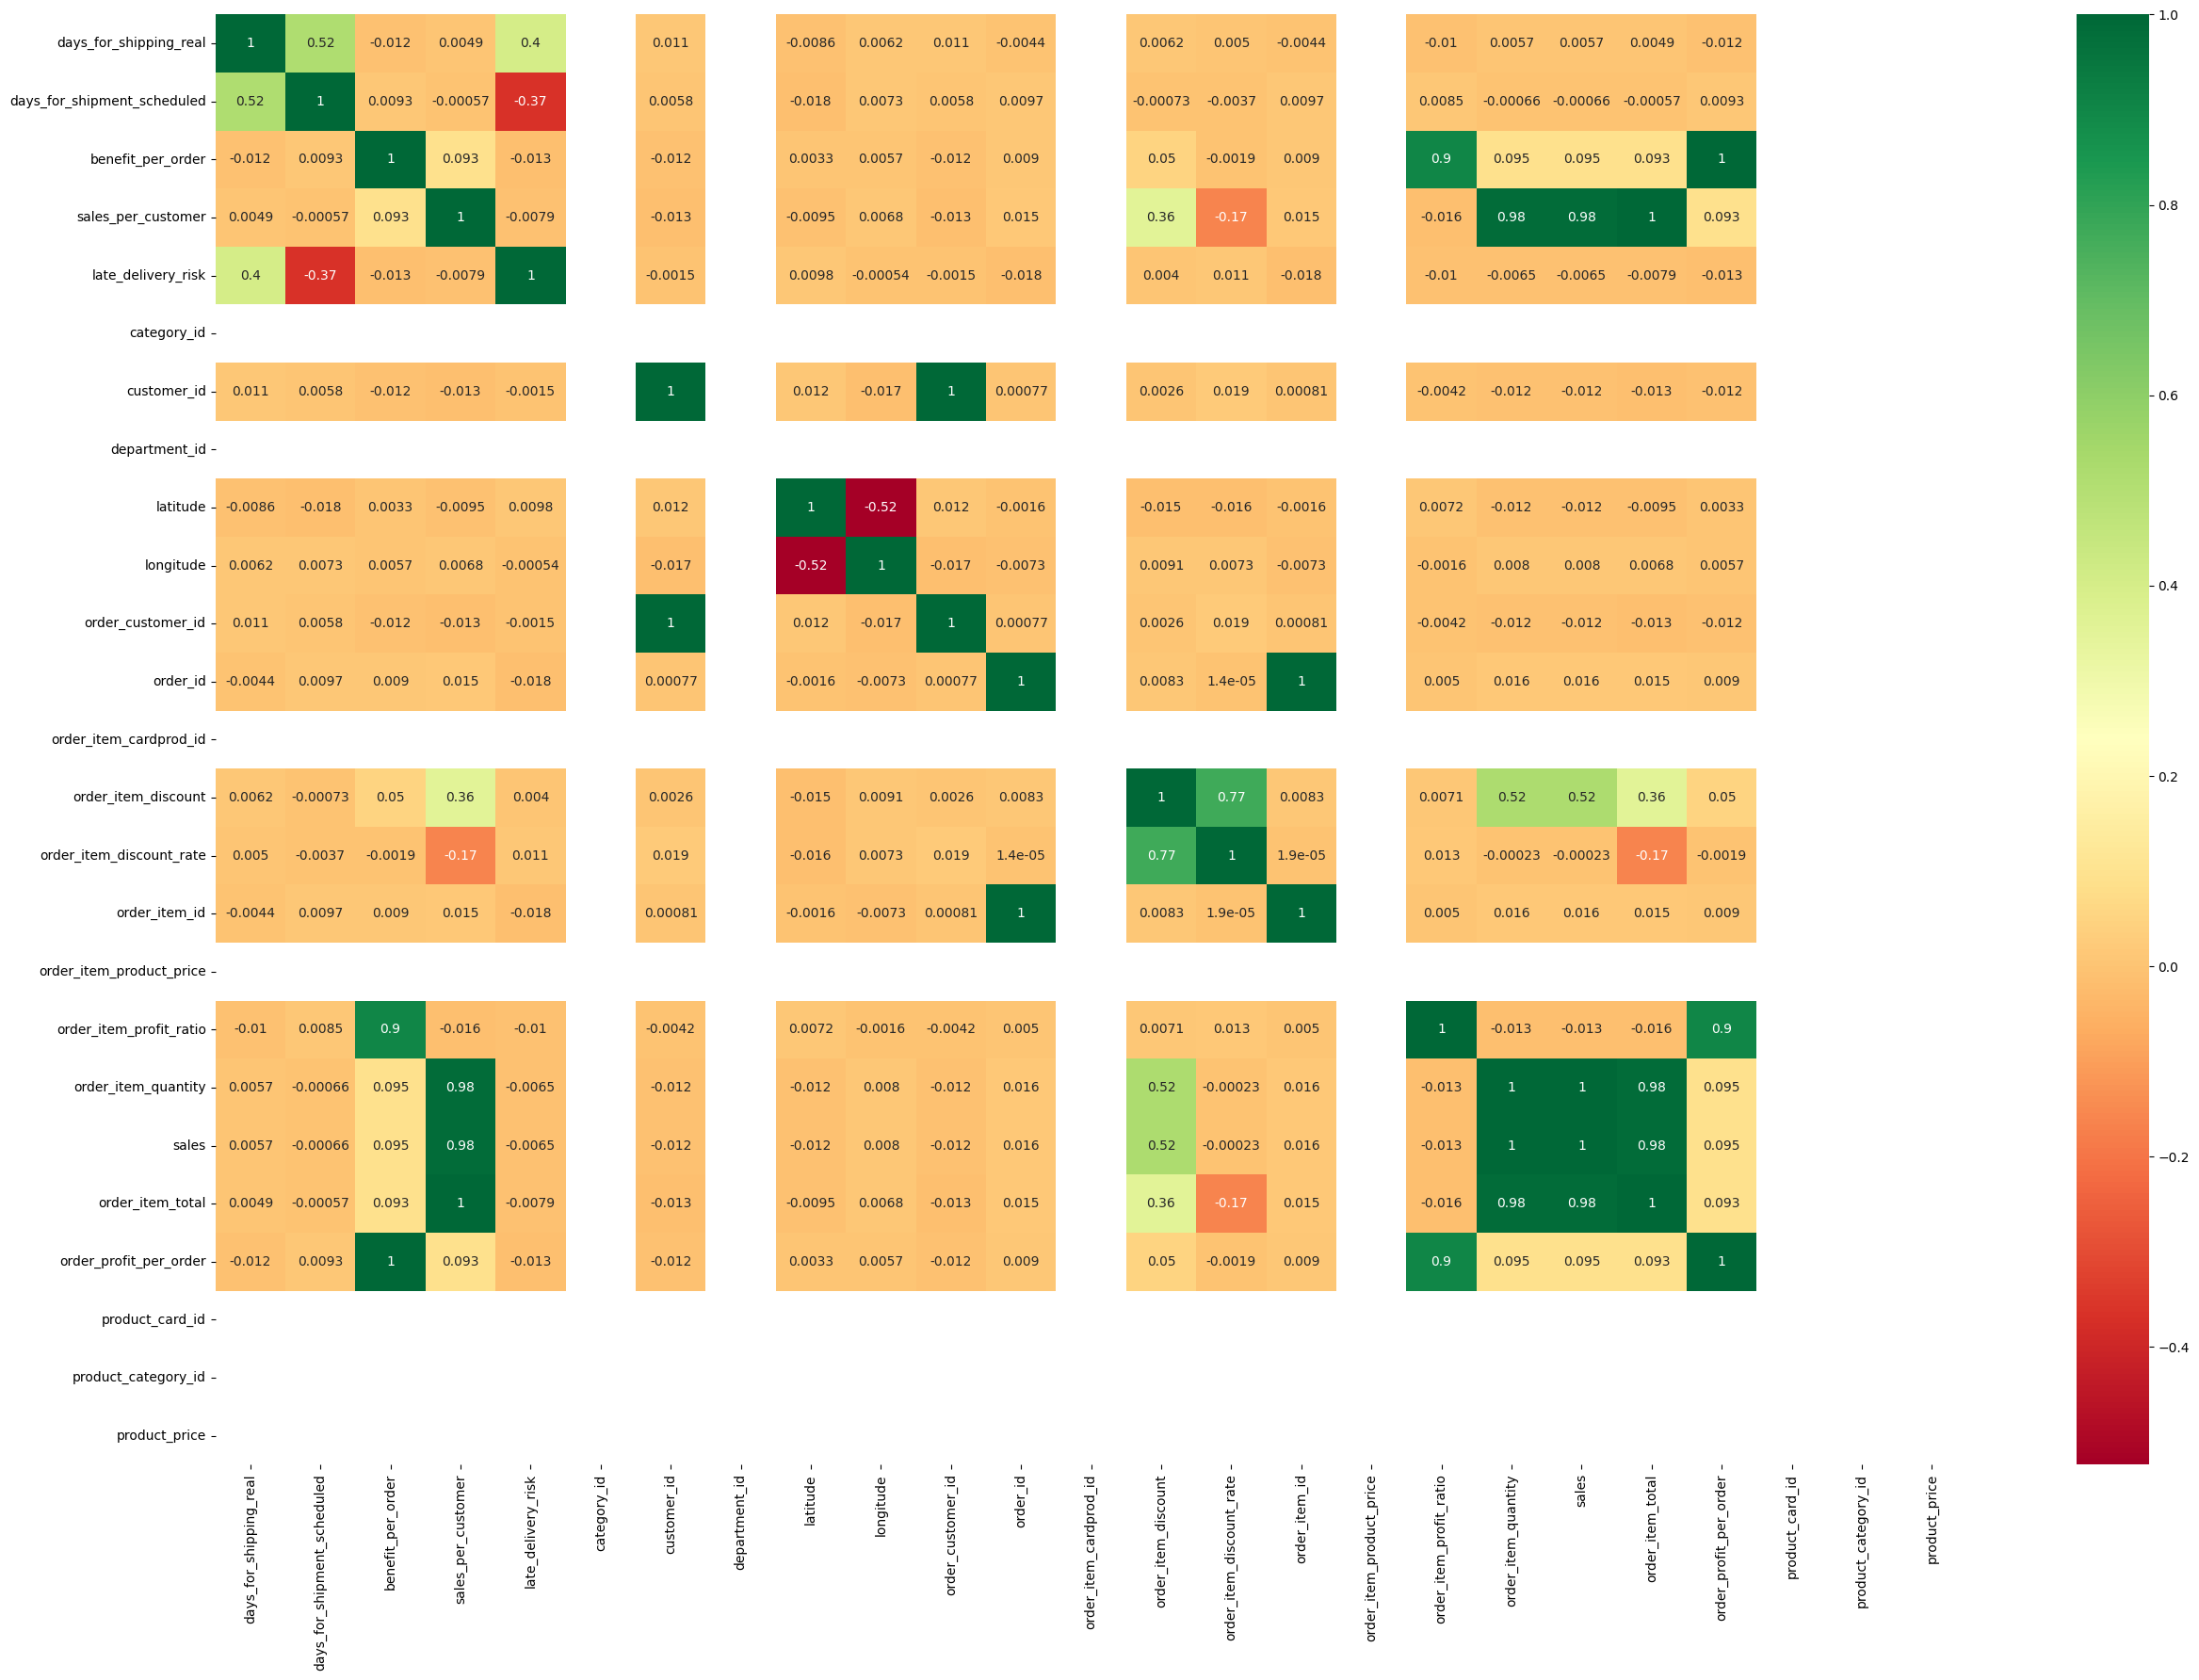

In [65]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Drop non-numeric columns
SCData_numeric = df.drop(columns=non_numeric_columns)

# Compute correlation matrix
corrmap = SCData_numeric.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(df[top].corr(),annot=True,cmap="RdYlGn")

In [66]:
df.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id',
       'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_category_id', 'product_name',
       'product_price', 'shipping_date_dateorders', 'shipping_mode', 'date',
       'time', 'order_date'],
      dtype='object')

In [67]:
# ['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
    #    'benefit_per_order', 'sales_per_customer', 'delivery_status',
    #    'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
    #    'customer_country', 'customer_id', 'customer_segment', 'customer_state',
    #    'department_id', 'department_name', 'latitude', 'longitude', 'market',
    #    'order_city', 'order_country', 'order_customer_id',
    #    'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
    #    'order_item_discount', 'order_item_discount_rate', 'order_item_id',
    #    'order_item_product_price', 'order_item_profit_ratio',
    #    'order_item_quantity', 'sales', 'order_item_total',
    #    'order_profit_per_order', 'order_region', 'order_state', 'order_status',
    #    'product_card_id', 'product_category_id', 'product_name',
    #    'product_price', 'shipping_date_dateorders', 'shipping_mode',
    #    'customer_full_name']

# feature = ['order_date','order_item_quantity','days_for_shipment_scheduled','category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','product_price','shipping_mode']
# feature = ['order_date','order_item_quantity','days_for_shipment_scheduled','category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','product_price','shipping_mode','order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio']
feature = ['order_date','order_item_quantity','category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','product_price','shipping_mode','order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio']

# feature = ['order_item_quantity','order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio','product_price']
df = df[feature]
# train_SC = SCData[['days_for_shipment_scheduled','category_id','customer_city','customer_country','customer_id','customer_segment','customer_state','department_name','market','product_name','product_price','shipping_mode','order_item_quantity']]

In [68]:
df = df.drop_duplicates()

# Check for duplicated rows
duplicated_rows = df.duplicated()
# Filter the DataFrame to show duplicated rows
duplicated_df = df[duplicated_rows]
print("Duplicated Rows:")
print(duplicated_df)


Duplicated Rows:
Empty DataFrame
Columns: [order_date, order_item_quantity, category_name, customer_city, customer_country, customer_segment, customer_state, department_name, market, product_name, product_price, shipping_mode, order_item_discount, order_item_discount_rate, order_item_product_price, order_item_profit_ratio]
Index: []


In [69]:
# object_columns = ['category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','shipping_mode']
object_columns = df.select_dtypes(include=['object']).columns.tolist()
for e in object_columns:
    tmp = pd.get_dummies(df[e],drop_first=True)
    df.drop([e],axis=1,inplace=True)
    df = pd.concat([df,tmp],axis=1)
df.shape

(12169, 616)

In [70]:
train =  df[df['order_date'].dt.isocalendar().year != 2017]
test =  df[df['order_date'].dt.isocalendar().year == 2017]

In [71]:
imputerealfeature = ['order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio']

for e in imputerealfeature:
    # Calculate the mean of 'order_item_discount' in the train set
    mean_train = train[e].mean()
    # Create a new column in the test set with the mean value from the train set
    test[e] = mean_train


In [72]:

dfx_train=train .loc[:, train .columns !='order_item_quantity']
y_train=train['order_item_quantity']
dfx_test=test .loc[:, test .columns !='order_item_quantity']
y_test=test['order_item_quantity']

# # x_train, x_test,y_train,x_test = train_test_split(xorderitemquantity,yorderitemquantity,test_size = 0.3, random_state = 42)
x_train = dfx_train.drop(['order_date'],axis=1)
# y_train = dfy_train.drop(['order_date'],axis=1)
x_test = dfx_test.drop(['order_date'],axis=1)
# y_test = dfy_test.drop(['order_date'],axis=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# x_train, x_test,y_train,y_test = train_test_split(xorderitemquantity,yorderitemquantity,test_size = 0.3, random_state = 42)

(8856, 614)
(8856,)
(3313, 614)
(3313,)


In [73]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [74]:
def regressionmodel(model_orderitemquantity,x_train, x_test,y_train,y_test):
    model_orderitemquantity=model_orderitemquantity.fit(x_train,y_train)#Fitting train data for Number of products per order
    y_pred=model_orderitemquantity.predict(x_test)#predicting Number of products per order with test data
    print('Model parameter used are:',model_orderitemquantity) #Printing the model to see which parameters are used
    print("MAE of Total amount per order is         :", metrics.mean_absolute_error(y_test,y_pred))  #Printing mean absolute error for predicting Number of products per order
    print("RMSE of Total amount per order is        :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))#Printing Root mean squared error for predicting Number of products per order
    return y_test,y_pred


# LinearRegression

In [75]:
model_LinearRegression=LinearRegression()
model_LinearRegression=model_LinearRegression.fit(x_train,y_train)#Fitting train data for Number of products per order
y_pred=model_LinearRegression.predict(x_test)#predicting Number of products per order with test data
y_pred = np.clip(y_pred, 0, 5)
print('Model used are:',model_LinearRegression) #Printing the model to see which parameters are used
print("MAE of Total amount per order is         :", metrics.mean_absolute_error(y_test,y_pred))  #Printing mean absolute error for predicting Number of products per order
print("RMSE of Total amount per order is        :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))#Printing Root mean squared error for predicting Number of products per order
df =pd.DataFrame({"Actual": y_test, "Predict": y_pred})



Model used are: LinearRegression()
MAE of Total amount per order is         : 1.2376867792881978
RMSE of Total amount per order is        : 1.4452835246551399


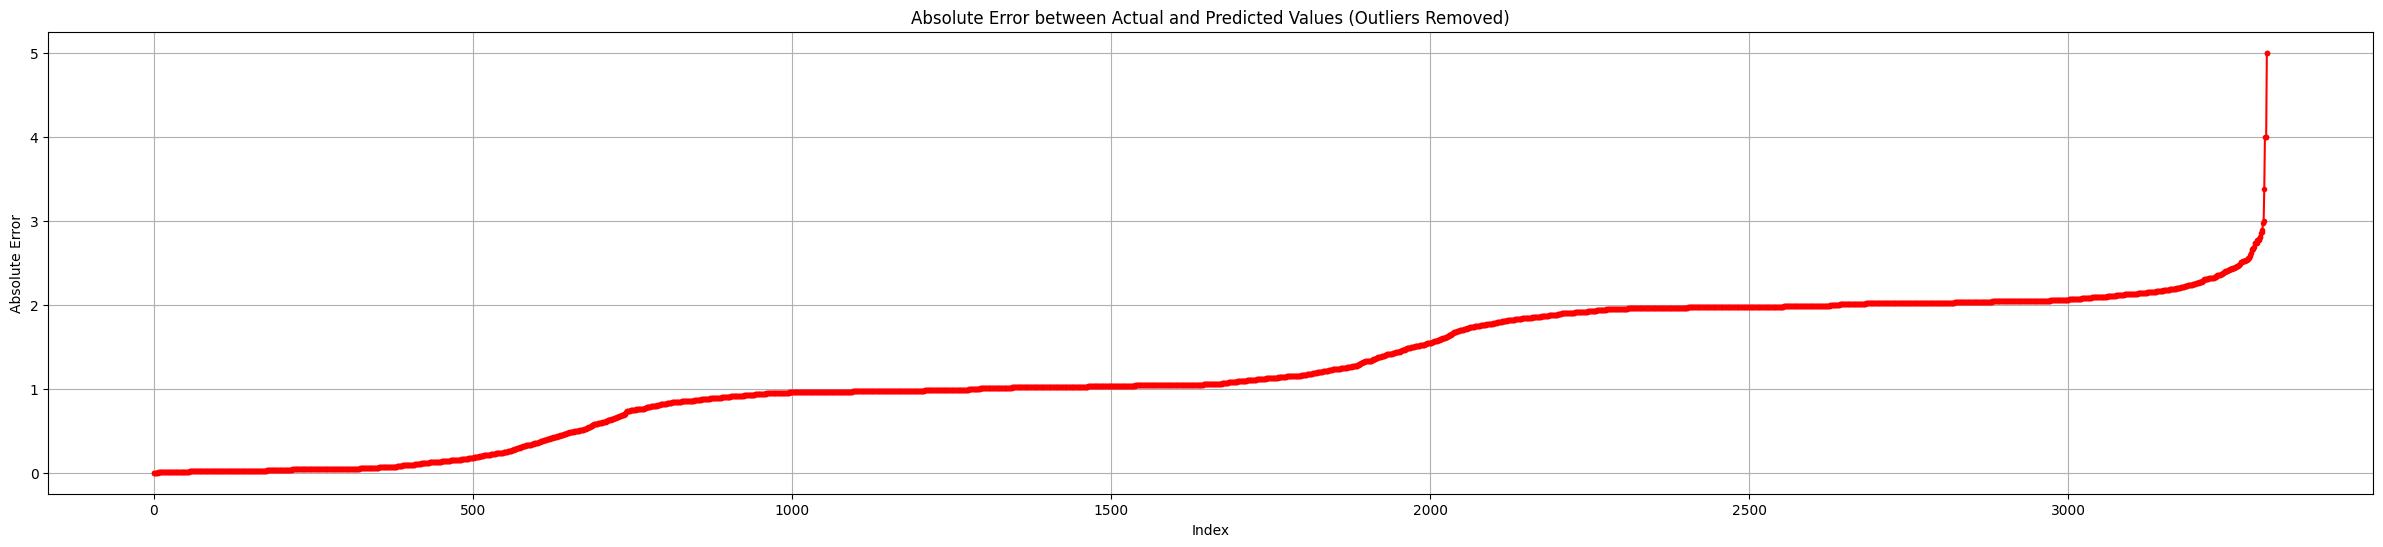

In [76]:
df['Abs_Error'] = abs(df['Actual'] - df['Predict'])
# Sort the DataFrame based on absolute error
df_sorted = df.sort_values(by='Abs_Error').reset_index()

plt.figure(figsize=(30, 6))
plt.plot(df_sorted['Abs_Error'], color='red', marker='.', linestyle='-', label='Trend Line')
plt.title('Absolute Error between Actual and Predicted Values (Outliers Removed)')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

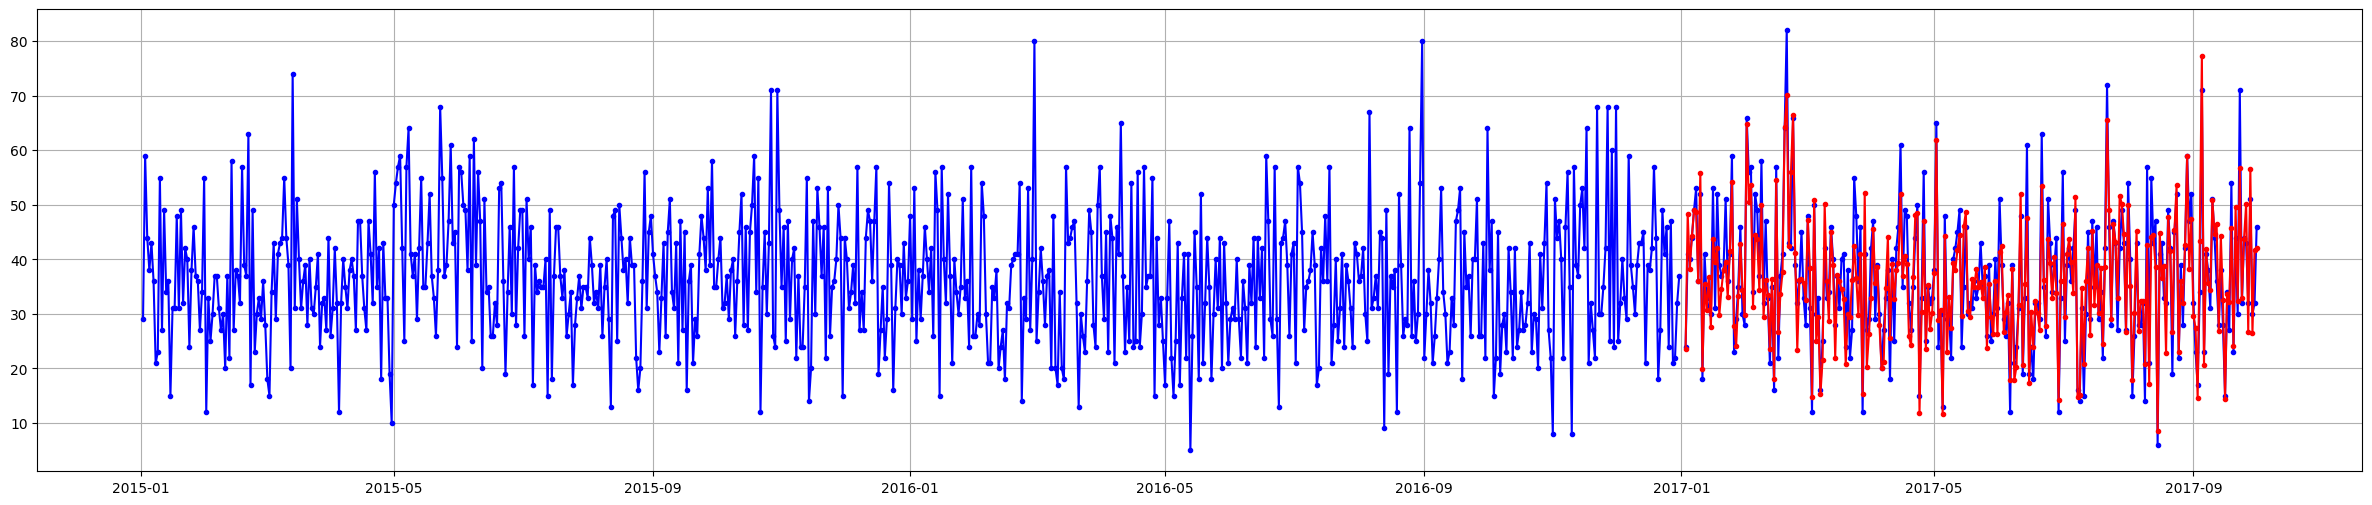

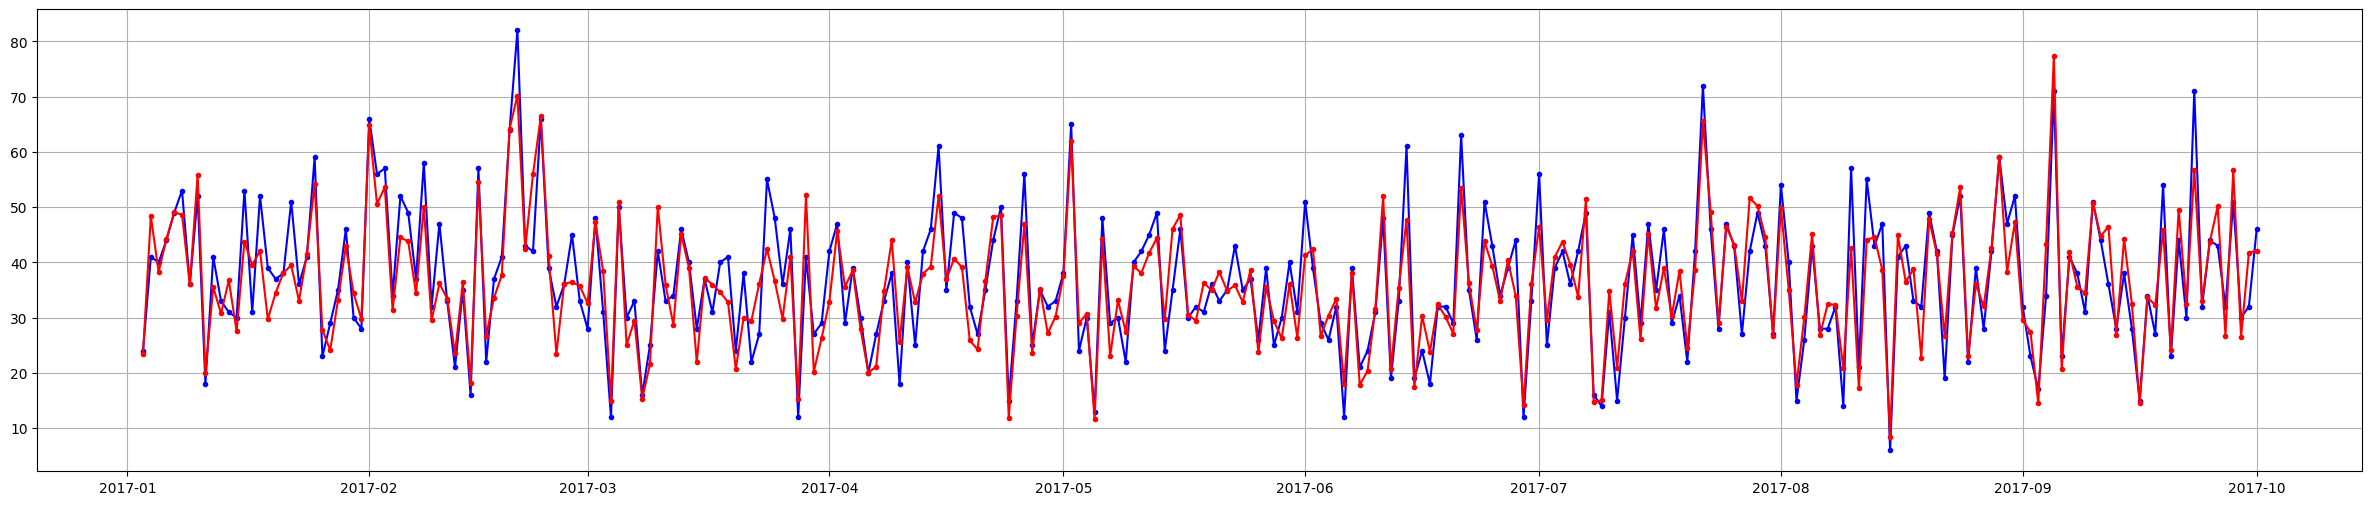

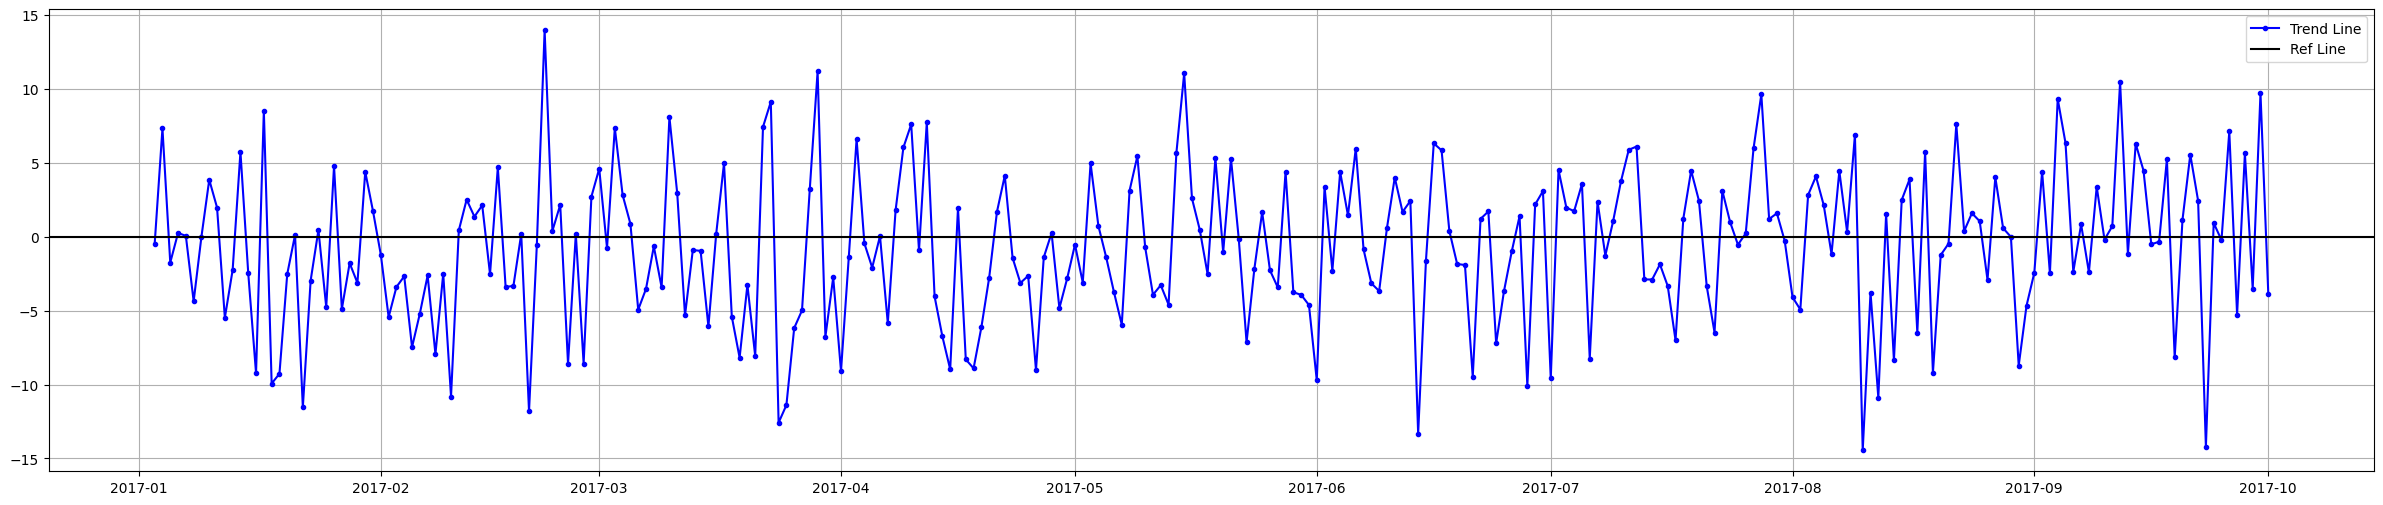

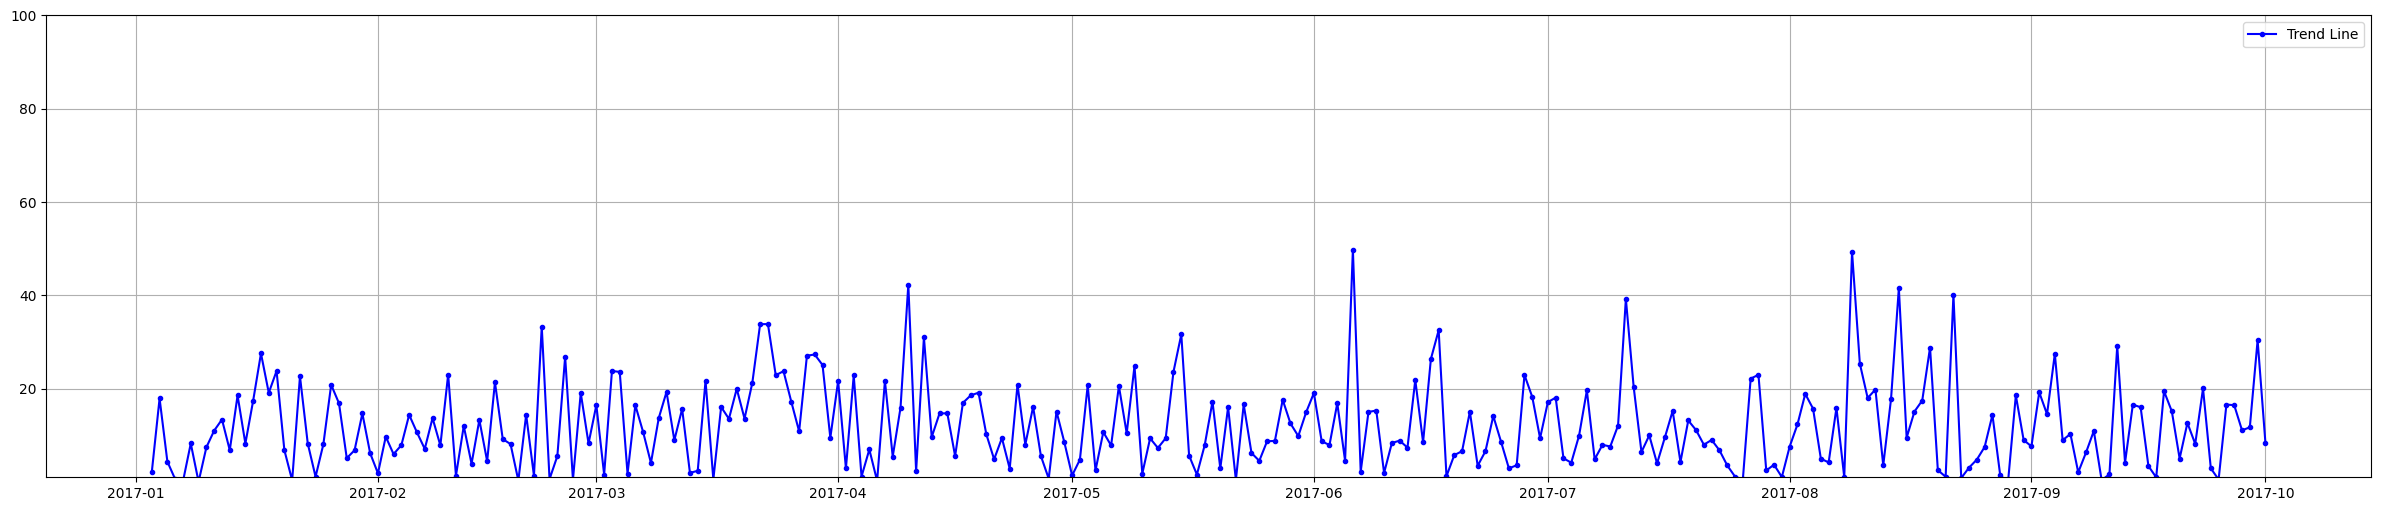

In [77]:
dfx_test['Actual'] = df['Actual'] 
dfx_test['Predict'] = df['Predict'] 

df_sorted = dfx_test.sort_values(by='order_date').reset_index()
dfx_train = dfx_train.sort_values(by='order_date').reset_index()
train = train.sort_values(by='order_date').reset_index()

# Grouping and summing 'Actual' and 'Predict' columns separately
df_grouped_actual = df_sorted.groupby('order_date')['Actual'].sum().reset_index()[1:-1]
df_grouped_predict = df_sorted.groupby('order_date')['Predict'].sum().reset_index()[1:-1]
df_grouped= train.groupby('order_date')['order_item_quantity'].sum().reset_index()[1:-1]
# Merging the two grouped DataFrames on 'order_date'
result_df = pd.merge(df_grouped_actual, df_grouped_predict, on='order_date', suffixes=('_actual', '_predict'))

plt.figure(figsize=(30, 6))
plt.plot(result_df['order_date'], result_df['Actual'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.plot(result_df['order_date'], result_df['Predict'], color='red', marker='.', linestyle='-', label='Trend Line')
plt.plot(df_grouped['order_date'], df_grouped['order_item_quantity'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.grid(True)
plt.show()


plt.figure(figsize=(30, 6))
plt.plot(result_df['order_date'], result_df['Actual'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.plot(result_df['order_date'], result_df['Predict'], color='red', marker='.', linestyle='-', label='Trend Line')
plt.grid(True)
plt.show()

plt.figure(figsize=(30, 6))
plt.plot(result_df['order_date'],result_df['Predict']-result_df['Actual'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.axhline(y=0, color='black', linestyle='-', label='Ref Line')
plt.grid(True)
plt.legend()  # Show legend
plt.show()


plt.figure(figsize=(30, 6))
plt.plot(result_df['order_date'], (abs(result_df['Predict'] - result_df['Actual']) / result_df['Actual']) * 100, color='blue', marker='.', linestyle='-', label='Trend Line')
plt.grid(True)
plt.legend()  # Show legend
plt.ylim(1, 100)  # Set y-axis limits
plt.show()

# DecisionTreeRegressor

In [78]:
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
model_DecisionTreeRegressor=model_DecisionTreeRegressor.fit(x_train,y_train)#Fitting train data for Number of products per order
y_pred=model_DecisionTreeRegressor.predict(x_test)#predicting Number of products per order with test data
print('Model used are:',model_DecisionTreeRegressor) #Printing the model to see which parameters are used
print("MAE of Total amount per order is         :", metrics.mean_absolute_error(y_test,y_pred))  #Printing mean absolute error for predicting Number of products per order
print("RMSE of Total amount per order is        :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))#Printing Root mean squared error for predicting Number of products per order

df =pd.DataFrame({"Actual": y_test, "Predict": y_pred})


Model used are: DecisionTreeRegressor()
MAE of Total amount per order is         : 1.2046483549652882
RMSE of Total amount per order is        : 1.4185822113969995


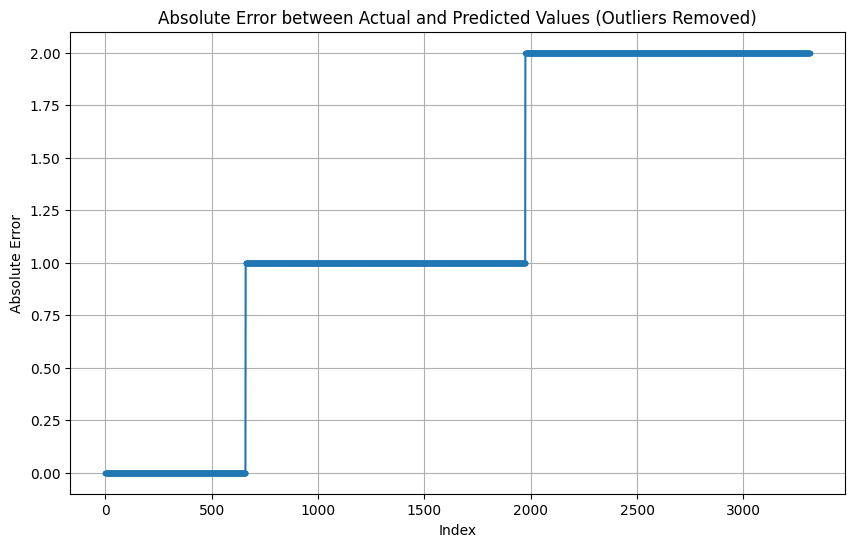

In [79]:
df['Abs_Error'] = abs(df['Actual'] - df['Predict'])

# Sort the DataFrame based on absolute error
df_sorted = df.sort_values(by='Abs_Error').reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Abs_Error'], marker='.')
plt.title('Absolute Error between Actual and Predicted Values (Outliers Removed)')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

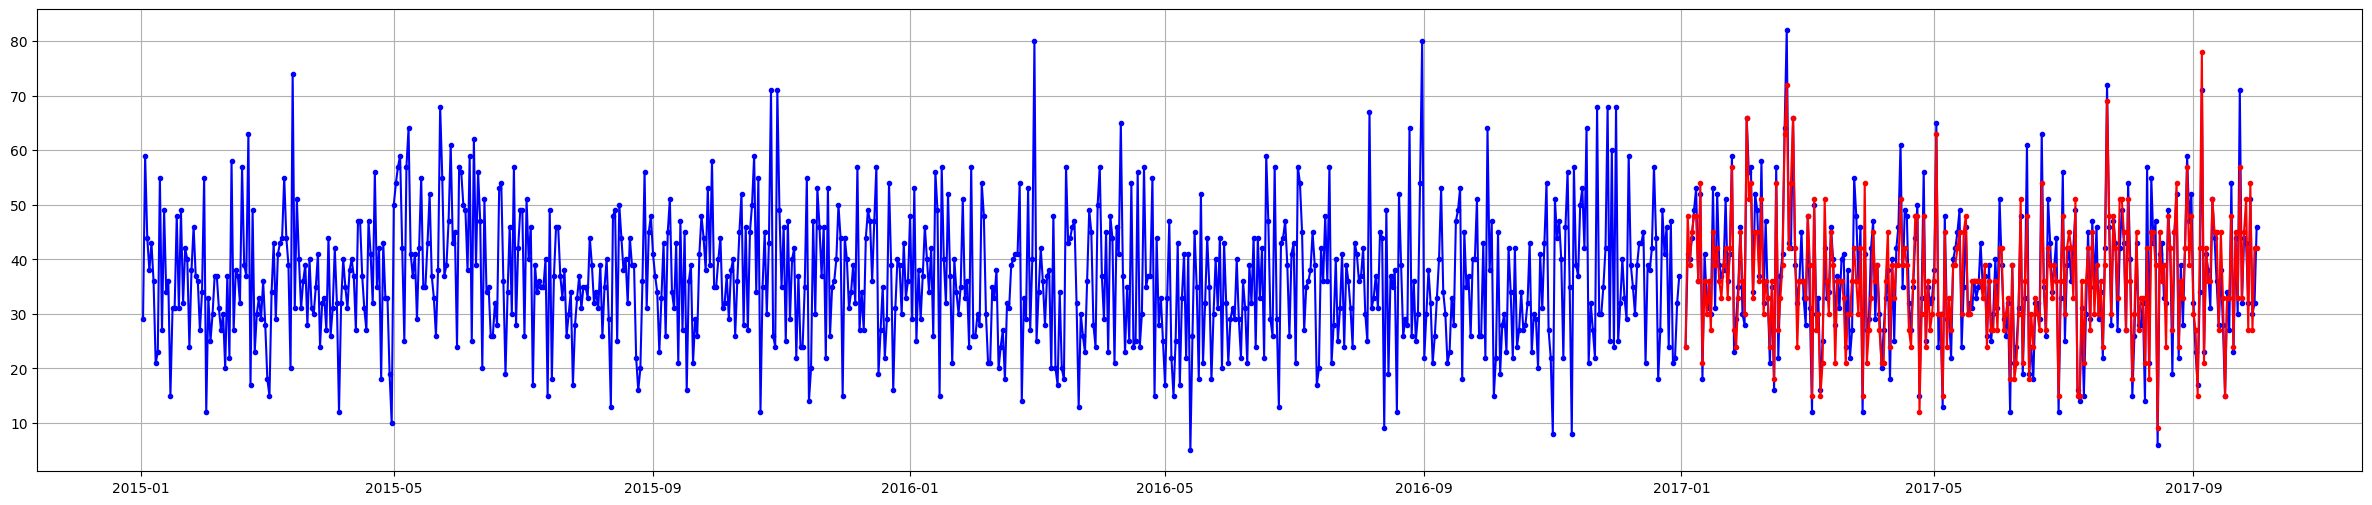

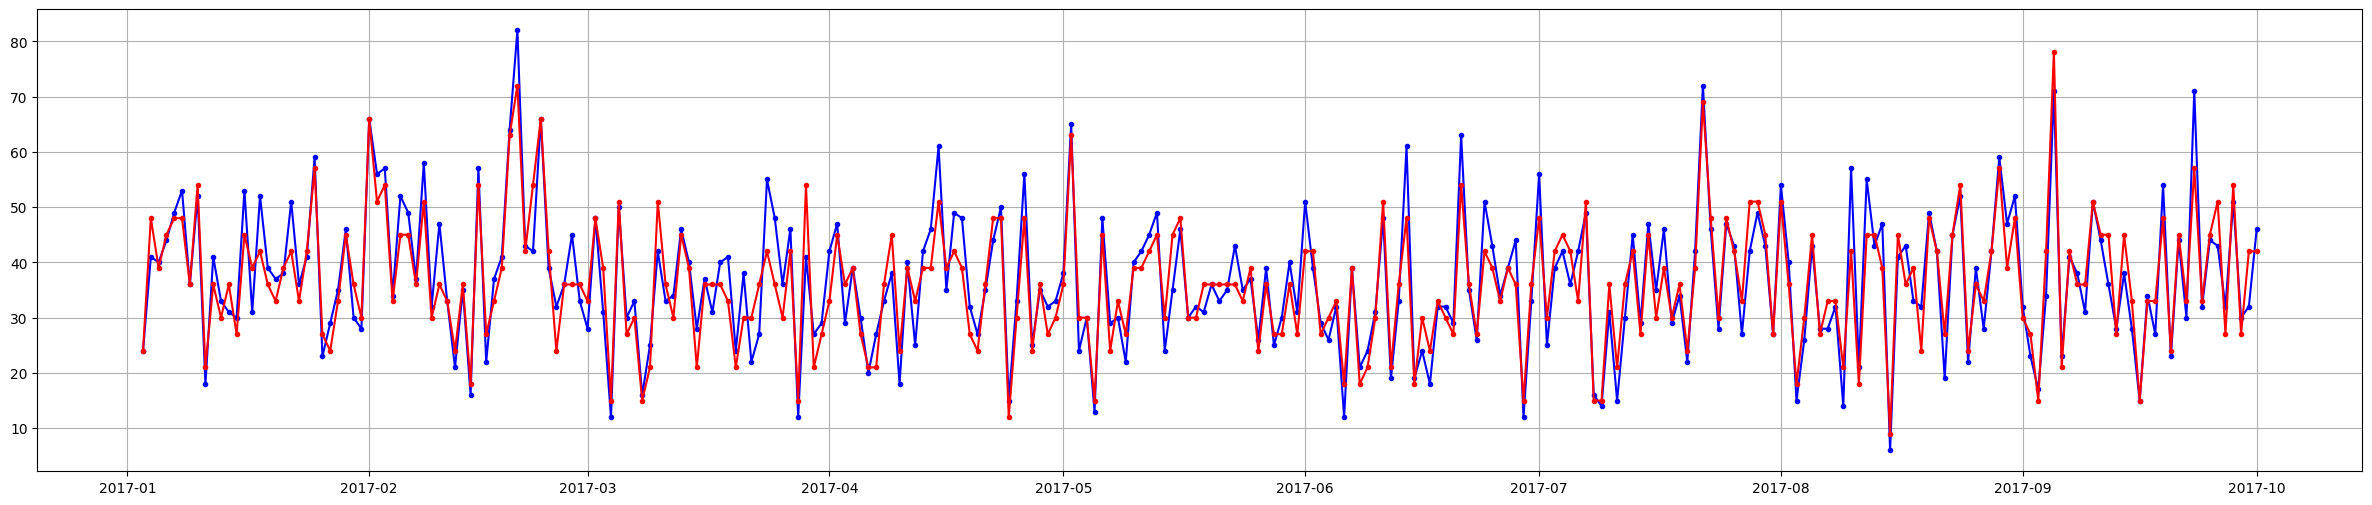

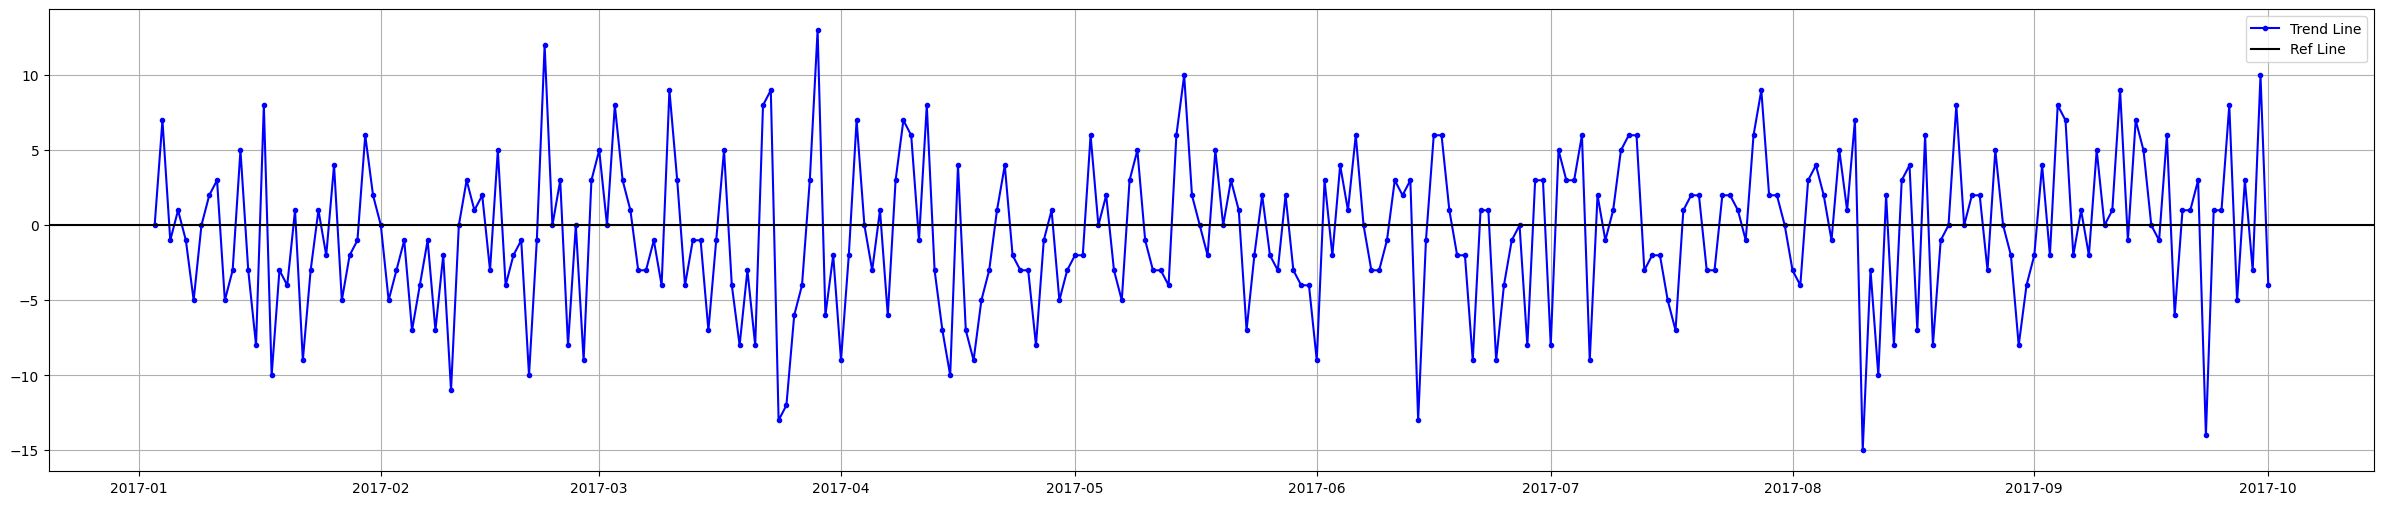

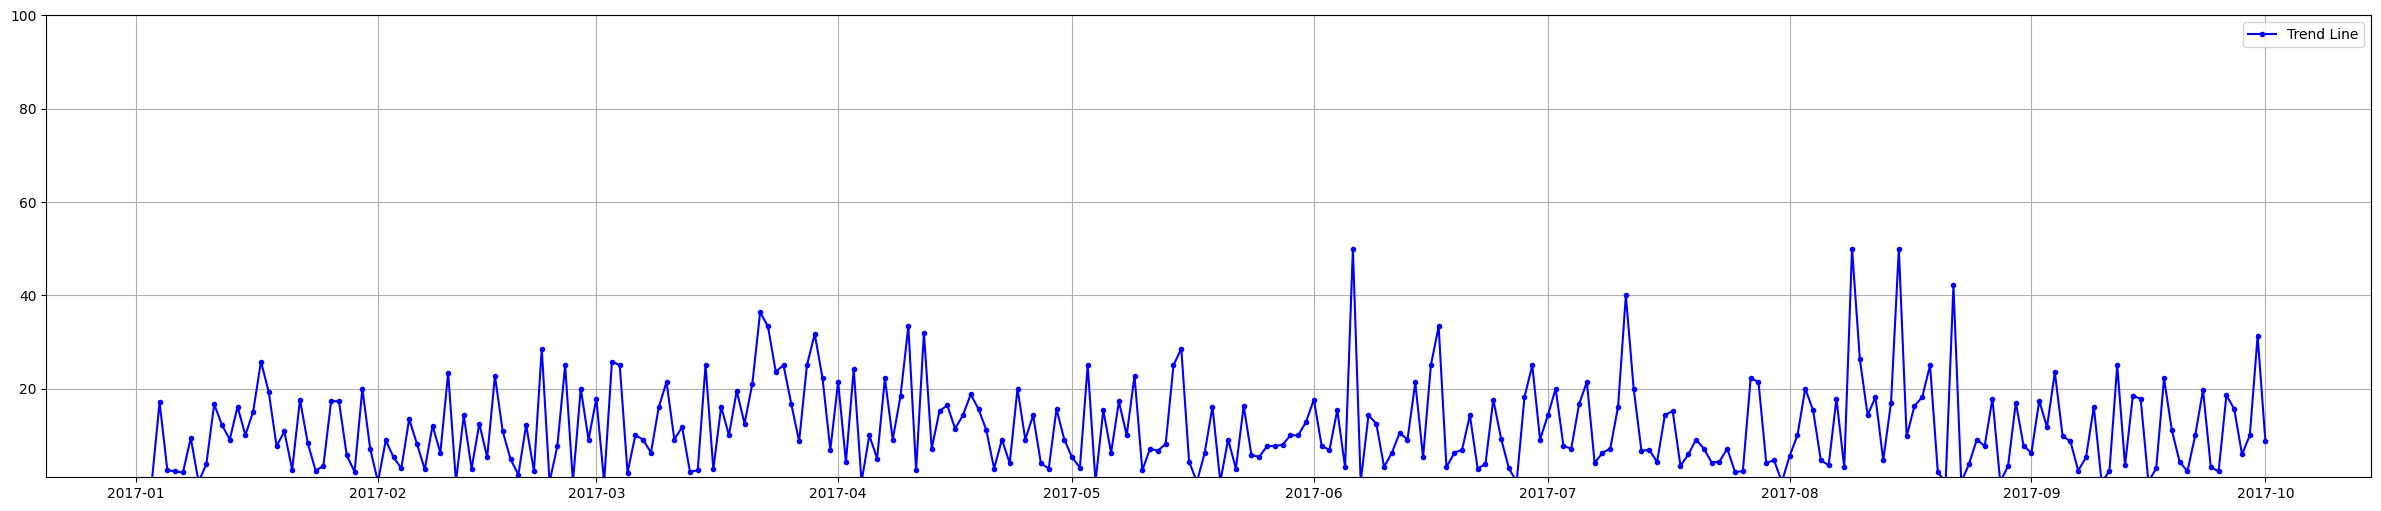

In [80]:
dfx_test['Actual'] = df['Actual'] 
dfx_test['Predict'] = df['Predict'] 

df_sorted = dfx_test.sort_values(by='order_date').reset_index()
dfx_train = dfx_train.sort_values(by='order_date').reset_index()
train = train.sort_values(by='order_date').reset_index()

# Grouping and summing 'Actual' and 'Predict' columns separately
df_grouped_actual = df_sorted.groupby('order_date')['Actual'].sum().reset_index()[1:-1]
df_grouped_predict = df_sorted.groupby('order_date')['Predict'].sum().reset_index()[1:-1]
df_grouped= train.groupby('order_date')['order_item_quantity'].sum().reset_index()[1:-1]
# Merging the two grouped DataFrames on 'order_date'
result_df = pd.merge(df_grouped_actual, df_grouped_predict, on='order_date', suffixes=('_actual', '_predict'))

plt.figure(figsize=(30, 6))
plt.plot(result_df['order_date'], result_df['Actual'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.plot(result_df['order_date'], result_df['Predict'], color='red', marker='.', linestyle='-', label='Trend Line')
plt.plot(df_grouped['order_date'], df_grouped['order_item_quantity'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.grid(True)
plt.show()


plt.figure(figsize=(30, 6))
plt.plot(result_df['order_date'], result_df['Actual'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.plot(result_df['order_date'], result_df['Predict'], color='red', marker='.', linestyle='-', label='Trend Line')
plt.grid(True)
plt.show()

plt.figure(figsize=(30, 6))
plt.plot(result_df['order_date'],result_df['Predict']-result_df['Actual'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.axhline(y=0, color='black', linestyle='-', label='Ref Line')
plt.grid(True)
plt.legend()  # Show legend
plt.show()


plt.figure(figsize=(30, 6))
plt.plot(result_df['order_date'], (abs(result_df['Predict'] - result_df['Actual']) / result_df['Actual']) * 100, color='blue', marker='.', linestyle='-', label='Trend Line')
plt.grid(True)
plt.legend()  # Show legend
plt.ylim(1, 100)  # Set y-axis limits
plt.show()

# RandomForestRegressor

In [81]:
# model_orderitemquantity = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
# y_test,y_pred = regressionmodel(model_orderitemquantity,x_train, x_test,y_train,y_test)
# df = pd.DataFrame({"Actual": y_test, "Predict": y_pred})

In [82]:
# df['Abs_Error'] = abs(df['Actual'] - df['Predict'])

# # Sort the DataFrame based on absolute error
# df_sorted = df.sort_values(by='Abs_Error')

# x1=df_sorted['Actual'].to_numpy()
# x2=df_sorted['Predict'].to_numpy()
# x3=df_sorted['Abs_Error'].to_numpy()
# plt.figure(figsize=(10, 6))
# plt.plot(x3, marker='.')
# plt.title('Absolute Error between Actual and Predicted Values (Outliers Removed)')
# plt.xlabel('Index')
# plt.ylabel('Absolute Error')
# plt.grid(True)
# plt.show()

# xgboost

In [83]:
# y_train1 = y_train-1
# y_test1= y_test-1

In [84]:
# import xgboost as xgb

# model_orderitemquantity = xgb.XGBClassifier(objective='multi:softprob', learning_rate=0.01, random_state=42)
# # regressionmodel(model_orderitemquantity,x_train, x_test,y_train,y_test)
# model_orderitemquantity.fit(x_train, y_train1,eval_set=[(x_test, y_test1)])
# y_pred = model_orderitemquantity.predict(x_test)
# df =pd.DataFrame({"Actual": y_test1, "Predict": y_pred})

In [85]:
# df['Abs_Error'] = abs(df['Actual'] - df['Predict'])

# # Sort the DataFrame based on absolute error
# df_sorted = df.sort_values(by='Abs_Error')

# x1=df_sorted['Actual'].to_numpy()
# x2=df_sorted['Predict'].to_numpy()
# x3=df_sorted['Abs_Error'].to_numpy()
# plt.figure(figsize=(10, 6))
# plt.plot(x3, marker='.')
# plt.title('Absolute Error between Actual and Predicted Values (Outliers Removed)')
# plt.xlabel('Index')
# plt.ylabel('Absolute Error')
# plt.grid(True)
# plt.show()

In [86]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'colsample_bytree': [0.7, 0.8],
#     'max_depth': [10, 20],
#     'n_estimators': [200],
#     'subsample': [0.8]
# }

# grid_search = GridSearchCV(model_orderitemquantity, param_grid, cv=5, verbose=2, n_jobs=1)
# grid_search.fit(x_train, y_train1, y_train1,eval_set=[(x_test, y_test1)])

In [87]:
# model_orderitemquantity = xgb.XGBClassifier(objective='multi:softprob', learning_rate=0.01, random_state=42)
# # regressionmodel(model_orderitemquantity,x_train, x_test,y_train,y_test)
# model_orderitemquantity.fit(x_train, y_train1,eval_set=[(x_test, y_test1)])
# y_pred = model_orderitemquantity.predict(x_test)
# df =pd.DataFrame({"Actual": y_test1, "Predict": y_pred})

# df =pd.DataFrame({"Actual": y_test1, "Predict": y_pred})